In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from scipy import stats
#from scipy.integrate import quad
#from scipy.optimize import minimize
#from functools import reduce
#from progressbar import progressbar as pbar
from local.lib import histos2d as h2d

# Formulation with raw data (without bins)

### does this formulation reflect the actual experiment?
### MLE estimator seems to be biased (see experiments below)

we have a process where $b$ and $s$ are random variables and $\mu$ is a parameter

$$  \eta = b + s$$

where:

- $b$, $s$ are background and signal

we assume:

- $b \sim exp(t)$ with pdf $p_b(x) \;\;\;\,$ we use $t$ instead of $\lambda$ for convinience in Python code
- $s \sim \mathcal{N}(\mu_s, \sigma_s)$ with pdf $p_s(x)$

the joint pdf for $\eta$ is:

$$p_\eta(x) = \frac{p_b(x)+\mu p_s(x)}{Z}$$

where 

- $\mu$ is the signal to background observation frequency relation
    - $\mu=0 \rightarrow$ no signal
    - $\mu=0.5 \rightarrow$ for each signal observation we get two background observations
    - $\mu=1 \rightarrow$ we have as many observations from $b$ as from $s$
    - etc.
    
- $Z=\int p_b(x)+\mu p_s(x)=\mu + 1$ is the normalization constant




### example estimation

mean MLE estimation is always above the real one

In [2]:
e1 = h2d.BS_raw_experiment(t=0.03, mu_s=60, sigma_s=4, mu=.1)
data = e1.sample(10000)

100% (5 of 5) |##########################| Elapsed Time: 0:00:12 Time:  0:00:12


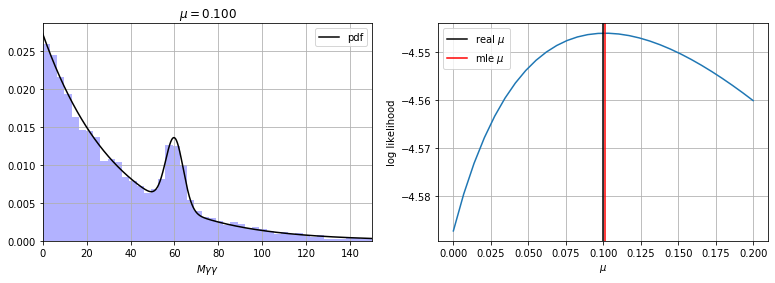

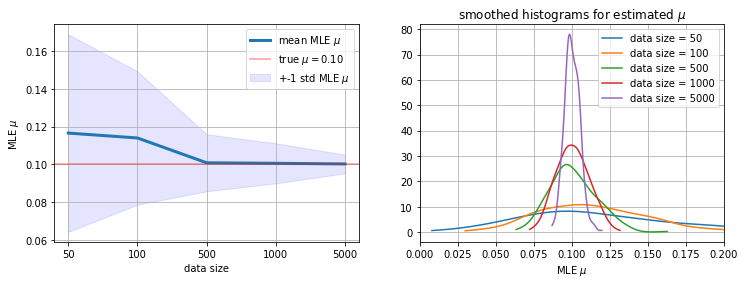

In [3]:
e1.plot(data)
e1.plot_MLE_mu_distributions()

## with smaller $\mu$

100% (5 of 5) |##########################| Elapsed Time: 0:00:09 Time:  0:00:09


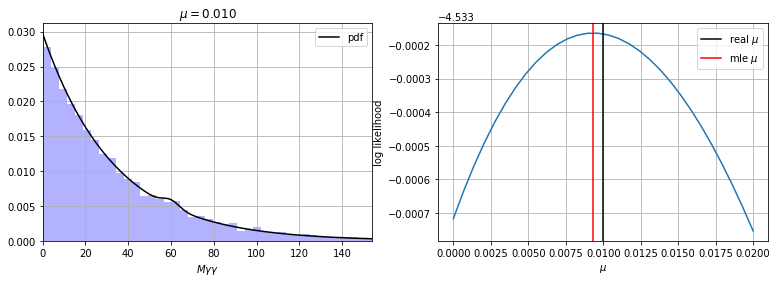

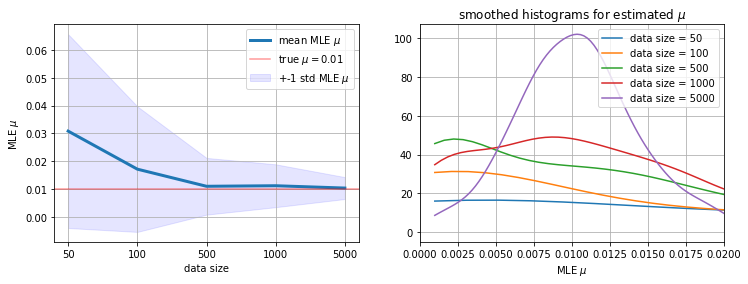

In [4]:
e1 = h2d.BS_raw_experiment(t=0.03, mu_s=60, sigma_s=4, mu=.01)
data = e1.sample(10000)
e1.plot(data)
e1.plot_MLE_mu_distributions()

## with wider $\mu_s$

100% (5 of 5) |##########################| Elapsed Time: 0:00:10 Time:  0:00:10


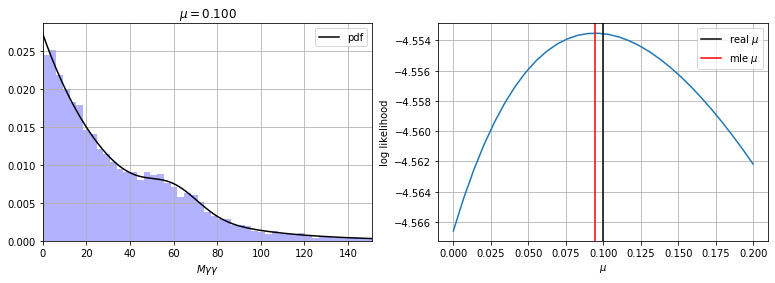

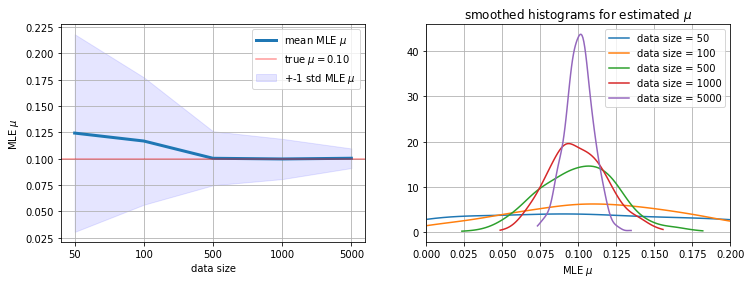

In [5]:
e1 = h2d.BS_raw_experiment(t=0.03, mu_s=60, sigma_s=12, mu=.1)
data = e1.sample(10000)
e1.plot(data)
e1.plot_MLE_mu_distributions()

# Obtain and inspect binned data from raw

### first check simulated data bins are distributed as Poisson

In [6]:
bin_edges = np.r_[[-np.inf]+list(np.linspace(20,140,7))+[np.inf]]
bin_edges

array([-inf,  20.,  40.,  60.,  80., 100., 120., 140.,  inf])

In [7]:
e1 = h2d.BS_raw_experiment(t=0.03, mu_s=60, sigma_s=4, mu=.1)

100% (500 of 500) |######################| Elapsed Time: 0:00:31 Time:  0:00:31


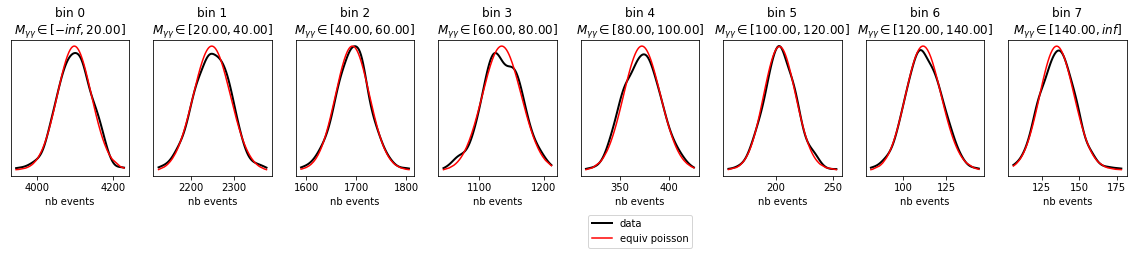

In [8]:
dataset_size = 10000
n_datasets = 500
e1.plot_bins_distributions(dataset_size, n_datasets, bin_edges)

100% (500 of 500) |######################| Elapsed Time: 0:00:31 Time:  0:00:31


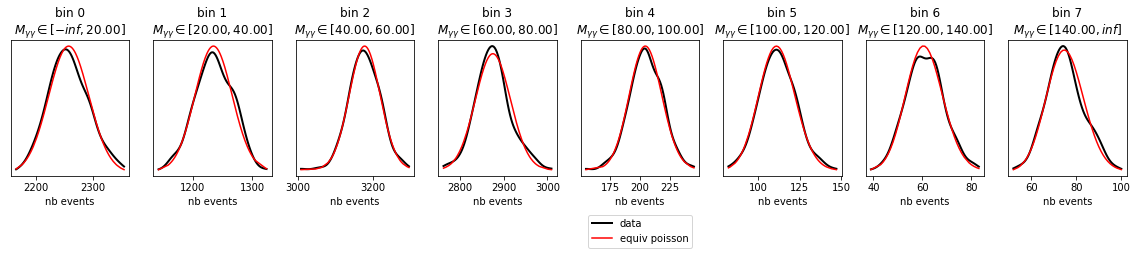

In [9]:
e1 = h2d.BS_raw_experiment(t=0.03, mu_s=60, sigma_s=4, mu=1)
e1.plot_bins_distributions(dataset_size, n_datasets, bin_edges)